# (Optional) Repeat the task 
Target categories: Iris-setosa, Iris-versicolour, and Iris-virginica    
We have same X_features, but diffrent y_target.

## Importing libraries and the dataset

In [173]:
# import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score, classification_report

In [174]:
# import the dataset
iris_df = pd.read_csv("Iris.csv", index_col=0)
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [175]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## What Data we have?
| Columns       |  Type                 |                           |   
| -------       |  -------------------- | --------------------------|
| SepalLengthCm | [Float][Continuous]   | Length of the sepal in cm |
| SepalWidthCm  | [Float][Continuous]   | Width of the sepal in cm  |
| PetalLengthCm | [Float][Continuous]   | Length of the petal in cm |
| PetalWidthCm  | [Float][Continuous]   | Width of the petal in cm  |
| Species       | [object][Categorical] | Species of the iris flower|

## Different between the independent variables and the dependent variable
From the Common Scence, the Independent variables (features):       
```
SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
```  

And dependent variable (target):  
```
Species
```

## Data exploration

In [176]:
# Generate descriptive statistics
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [177]:
# Group by Species
iris_df.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Data Preprocessing

In [178]:
# Encode data
label_encoder =  LabelEncoder()
iris_df["SpeciesLabeled"] = label_encoder.fit_transform(iris_df["Species"])
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesLabeled
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
6,5.4,3.9,1.7,0.4,Iris-setosa,0
7,4.6,3.4,1.4,0.3,Iris-setosa,0
8,5.0,3.4,1.5,0.2,Iris-setosa,0
9,4.4,2.9,1.4,0.2,Iris-setosa,0


In [179]:
# Group by Species
iris_df.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesLabeled
Species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.0
Iris-versicolor,5.936,2.770,4.260,1.326,1.0
Iris-virginica,6.588,2.974,5.552,2.026,2.0


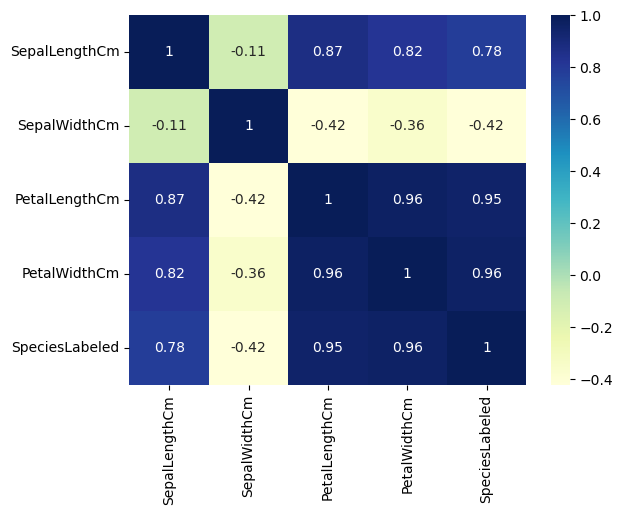

In [180]:
# Draw the heatmap
sns.heatmap(iris_df.drop("Species", axis=1).corr(), annot=True, cmap='YlGnBu')
plt.show()

In [181]:
X_features = iris_df.drop(["Species", "SpeciesLabeled"], axis=1)
y_target = iris_df["SpeciesLabeled"]

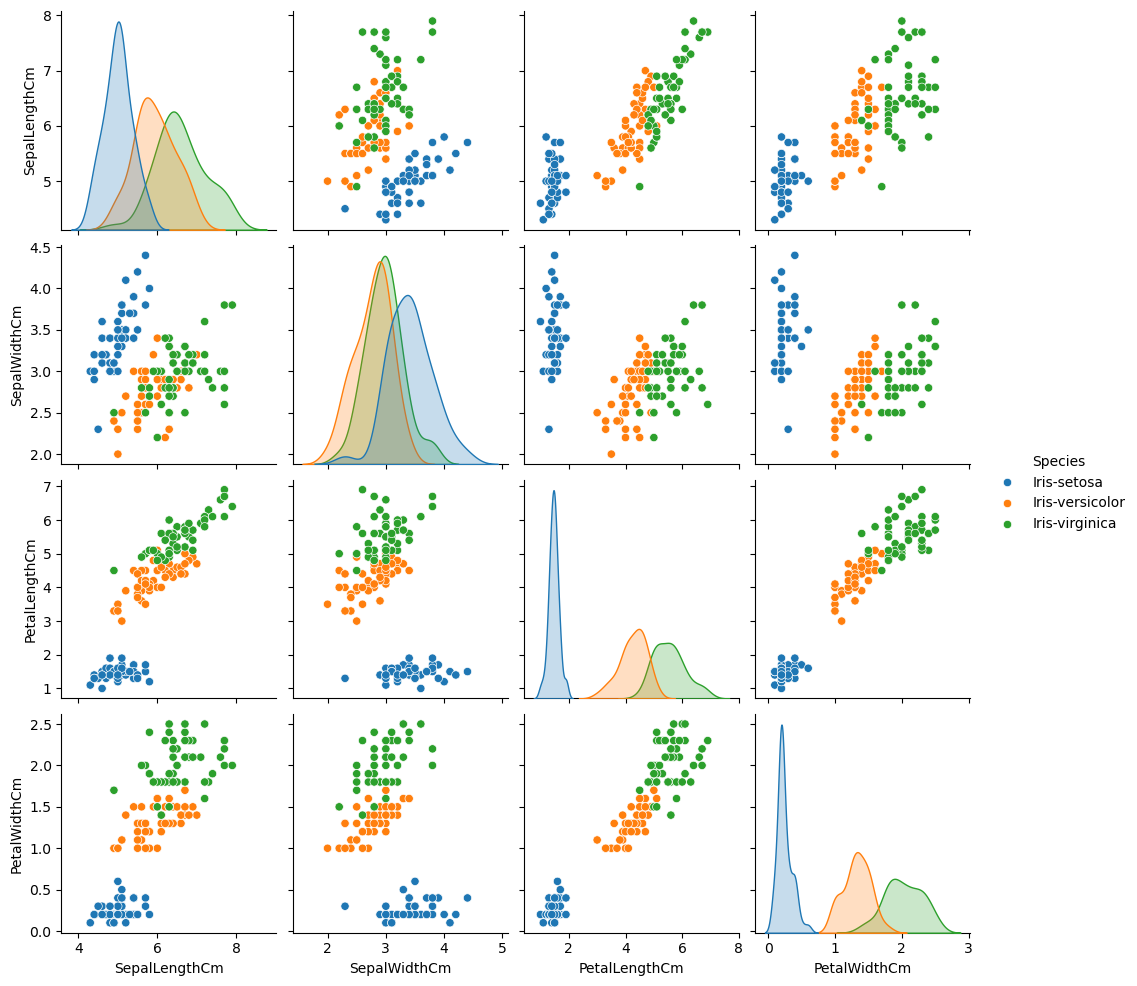

In [182]:
# Plot the distribution of the data
sns.pairplot(iris_df.drop(["SpeciesLabeled"], axis=1), hue="Species")

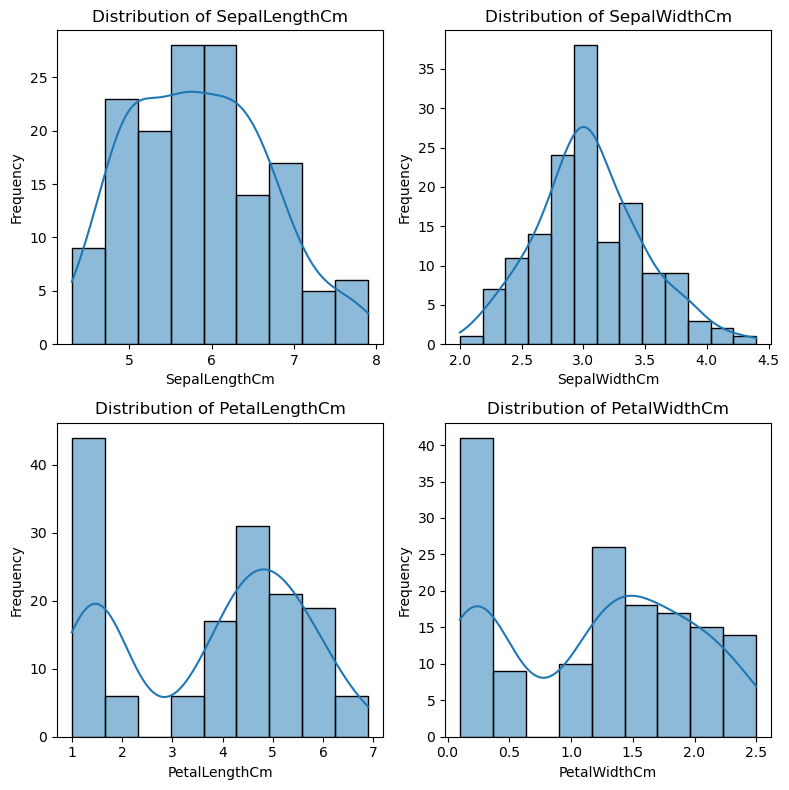

In [183]:
# Plot histogram distribution of features
figure, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, col in enumerate(X_features.columns):
    sns.histplot(x=X_features[col], kde=True, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [184]:
# Split data into training and test sets
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2,  random_state=rseed)

# Pint Training and Test data shapes
print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (120, 4) (120,)
Test data: (30, 4) (30,)


In [185]:
# Fit the scaler on train data
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Fit and transform the train data
features_standard = ["SepalLengthCm", "SepalWidthCm"]
features_normalize = ["PetalLengthCm", "PetalWidthCm"]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[features_standard] = scaler_standard.fit_transform(X_train[features_standard])
X_train_scaled[features_normalize] = scaler_normal.fit_transform(X_train[features_normalize])

# Transform the test data
X_test_scaled[features_standard] = scaler_standard.transform(X_test[features_standard])
X_test_scaled[features_normalize] = scaler_normal.transform(X_test[features_normalize])

## Implementing Logistic Regression model

In [186]:
# Fit a model
iris_model = LogisticRegression()
iris_model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = iris_model.predict(X_test_scaled)

## Measuring Model Performance


### Confusion matrix

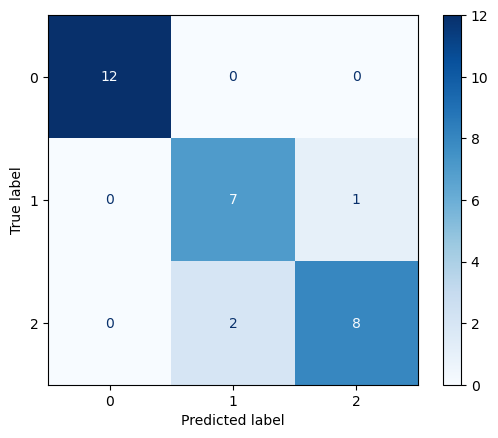

In [187]:

confusion_matrix_ndarray = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_ndarray)
confusion_matrix_display.plot(cmap="Blues")

### Accuracy

In [188]:
# Accuracy
score = iris_model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.1f}%")


Accuracy: 90.0%


### Average F1 Score

In [189]:
# Average F1 Score
score_f1 = f1_score(y_test, y_pred, average='micro')
print(f"Average F1 Score: {score_f1*100:.1f}%")

Average F1 Score: 90.0%


### Precision, Recall and Report

In [190]:
report = classification_report(y_test, y_pred, labels=iris_model.classes_)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      0.88      0.82         8
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



The model is likely to have higher precision, higher recall, higher accuracy score and higher F1 score.

## Make a prediction on new data

In [191]:
# Show the X_test data
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
140,6.9,3.1,5.4,2.1
126,7.2,3.2,6.0,1.8
68,5.8,2.7,4.1,1.0
4,4.6,3.1,1.5,0.2
114,5.7,2.5,5.0,2.0


In [192]:
# Show the X_test_scaled data
X_test_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
140,1.291282,0.157274,0.745763,0.833333
126,1.653888,0.381950,0.847458,0.708333
68,-0.038275,-0.741433,0.525424,0.375000
4,-1.488701,0.157274,0.084746,0.041667
114,-0.159144,-1.190786,0.677966,0.791667


In [193]:
# Assuming this new data
new_data = pd.DataFrame({"SepalLengthCm": [6.9], "SepalWidthCm": [3.2], "PetalLengthCm": [5.4], "PetalWidthCm": [2.0]})
new_data[features_standard] = scaler_standard.transform(new_data[features_standard])
new_data[features_normalize] = scaler_normal.transform(new_data[features_normalize])
print(new_data)

# Make a prediction
prediction = iris_model.predict(new_data)
print(f"Prediction: {prediction}")
if prediction == 0:
    print("Iris-setosa")
elif prediction == 1 :
    print("Iris-versicolor")
elif prediction == 2:
    print("Iris-virginica")
else:
    print("may be error")

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       1.291282       0.38195       0.745763      0.791667
Prediction: [2]
Iris-virginica
